In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath

In [2]:
path = "/home/jsk/cylinder/chapter3data/2021-05-11_215135" 

In [3]:
infile = os.path.join(path, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 50000
--field_type lattice
--method  sequential
--alpha -1
--C .1
--u 1
--n 6
--kappa 0
--gamma 10 
--temp .0001
--temp_final .000001
--intrinsic_curvature  0
--amplitude 0
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



In [4]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data.columns = data.columns.astype("float")
        data.index = data.index.astype("float")
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data

In [5]:
def complex_array_to_rgb(X, theme='dark', rmax=None):
    '''Takes an array of complex number and converts it to an array of [r, g, b],
    where phase gives hue and saturaton/value are given by the absolute value.
    Especially for use with imshow for complex plots.'''
    absmax = rmax or np.abs(X).max()
    Y = np.zeros(X.shape + (3,), dtype='float')
    Y[..., 0] = np.angle(X) / (2 * math.pi) % 1
    if theme == 'light':
        Y[..., 1] = np.clip(np.abs(X) / absmax, 0, 1)
        Y[..., 2] = 1
    elif theme == 'dark':
        Y[..., 1] = 1
        Y[..., 2] = np.clip(np.abs(X) / absmax, 0, 1)
    Y = matplotlib.colors.hsv_to_rgb(Y)
    return Y

def complex_heatmap(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    plt.imshow(complex_array_to_rgb(data, theme, rmax))

<AxesSubplot:>

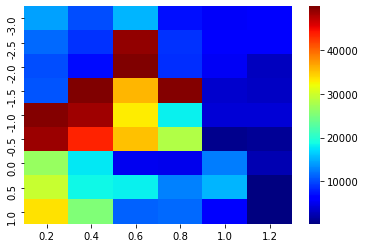

In [6]:
global_cutoff= sort_csv(path+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

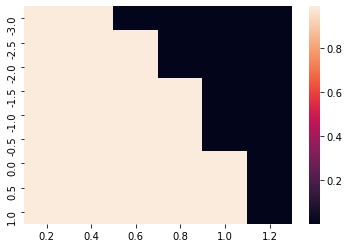

In [7]:
abs_amplitude2= sort_csv(path+"/abs_amplitude.csv")
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

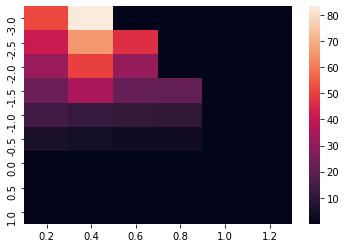

In [8]:
abs_amplitude2= sort_csv(path+"/field_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

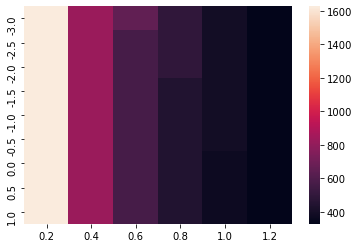

In [9]:
abs_amplitude2= sort_csv(path+"/surface_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2)

<AxesSubplot:>

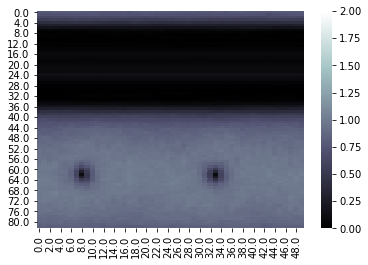

In [10]:
snapshot_0p7_1= sort_csv(path+"/wavenumber_0.6_alpha_-1.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_1, cmap='bone', vmax=2, vmin=0)

<AxesSubplot:>

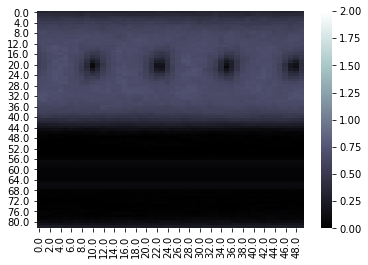

In [11]:
snapshot_0p7_1= sort_csv(path+"/wavenumber_0.6_alpha_-0.5_snapshot.csv", dtype=complex)
sb.heatmap(snapshot_0p7_1, cmap='bone', vmax=2, vmin=0)
#the developed amplitude is sqrt(.5)

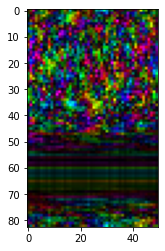

In [12]:
complex_heatmap(path+"/wavenumber_0.6_alpha_1.0_snapshot.csv")

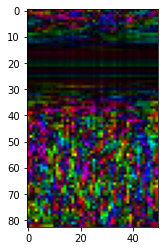

In [13]:

complex_heatmap(path+"/wavenumber_0.6_alpha_0.5_snapshot.csv")

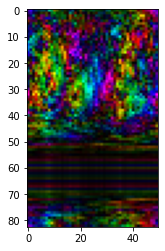

In [14]:

complex_heatmap(path+"/wavenumber_0.6_alpha_0.0_snapshot.csv")

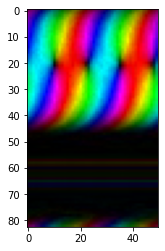

In [15]:

complex_heatmap(path+"/wavenumber_0.6_alpha_-0.5_snapshot.csv")

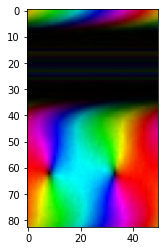

In [16]:
complex_heatmap(path+"/wavenumber_0.6_alpha_-1.0_snapshot.csv")

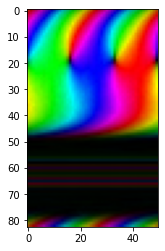

In [17]:

complex_heatmap(path+"/wavenumber_0.6_alpha_-1.5_snapshot.csv")

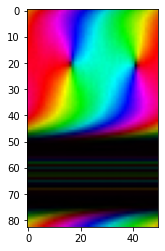

In [18]:
complex_heatmap(path+"/wavenumber_0.6_alpha_-2.0_snapshot.csv")

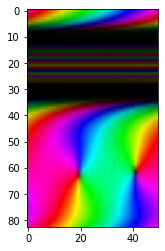

In [19]:
complex_heatmap(path+"/wavenumber_0.6_alpha_-2.5_snapshot.csv")

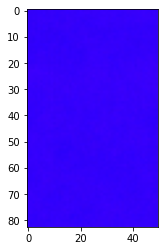

In [20]:
complex_heatmap(path+"/wavenumber_0.6_alpha_-3.0_snapshot.csv")

In [21]:
time_data= pd.read_csv(path+"/wavenumber_0.6_alpha_-0.5.csv")
time_data1= pd.read_csv(path+"/wavenumber_0.6_alpha_-0.5.csv")
time_data2= pd.read_csv(path+"/wavenumber_0.6_alpha_-1.5.csv")
time_data3= pd.read_csv(path+"/wavenumber_0.6_alpha_-2.5.csv")
time_data4= pd.read_csv(path+"/wavenumber_0.6_alpha_-2.0.csv")

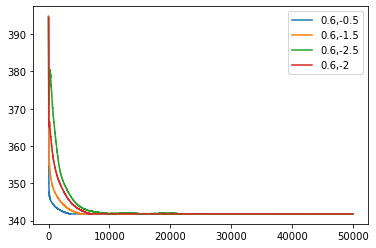

In [22]:
subject="surface_energy"
plt.plot([x*.6 for x in time_data.loc[:,subject]], label='0.6,-0.5')
plt.plot([x*.6 for x in time_data2.loc[:,subject]], label='0.6,-1.5')
plt.plot([x*.6 for x in time_data3.loc[:,subject]], label='0.6,-2.5')
plt.plot([x*.6 for x in time_data4.loc[:,subject]], label='0.6,-2')
plt.legend()

(0.0, 50.0)

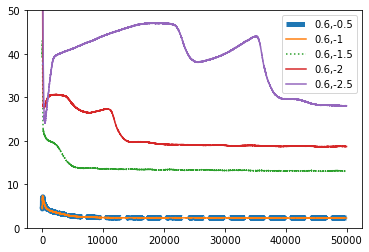

In [23]:
subject="field_energy"
plt.plot([complex(x).real*.6 for x in time_data.loc[:,subject]], label='0.6,-0.5', linestyle='--', linewidth=5)#4 defects
plt.plot([complex(x).real*.6  for x in time_data1.loc[:,subject]], label='0.6,-1') #2 defects
plt.plot([complex(x).real*.6 for x in time_data2.loc[:,subject]], label='0.6,-1.5', linestyle=':') #3 defects
plt.plot([complex(x).real*.6 for x in time_data4.loc[:,subject]], label='0.6,-2') #2 defects
plt.plot([complex(x).real*.6 for x in time_data3.loc[:,subject]], label='0.6,-2.5') #2 defects
plt.legend()
plt.ylim((0,50))
#field energy per areaa increades with alpha, not linearly or quadratically as compromise between alpha^2 , alpha terms

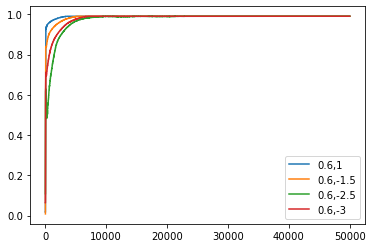

In [24]:
subject="abs_amplitude"
plt.plot([x for x in time_data.loc[:,subject]], label='0.6,1')
plt.plot([x for x in time_data2.loc[:,subject]], label='0.6,-1.5')
plt.plot([x for x in time_data3.loc[:,subject]], label='0.6,-2.5')
plt.plot([x for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.legend()

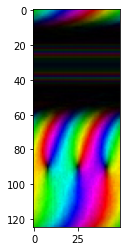

In [25]:
complex_heatmap(path+"/wavenumber_0.4_alpha_-0.5_snapshot.csv")

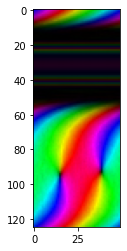

In [26]:
complex_heatmap(path+"/wavenumber_0.4_alpha_-1.0_snapshot.csv")

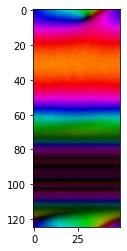

In [27]:
complex_heatmap(path+"/wavenumber_0.4_alpha_-1.5_snapshot.csv")

This one maybe just started introducing a defect

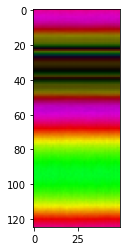

In [28]:
complex_heatmap(path+"/wavenumber_0.4_alpha_-2.5_snapshot.csv")

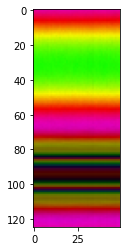

In [29]:
complex_heatmap(path+"/wavenumber_0.4_alpha_-3.0_snapshot.csv")

no tendency to rotation seen.  Here Ath is bigger -> wider energy gap to first roational level?  E~(n Ath - dth)^2 Stronger ordering when I give the field a head start leading tothis non-minimum state?

In [30]:
time_data= pd.read_csv(path+"/wavenumber_0.4_alpha_1.0.csv")
time_data2= pd.read_csv(path+"/wavenumber_0.4_alpha_-1.5.csv")
time_data3= pd.read_csv(path+"/wavenumber_0.4_alpha_-2.5.csv")
time_data4= pd.read_csv(path+"/wavenumber_0.4_alpha_-3.0.csv")

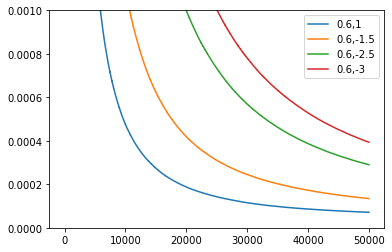

In [31]:
subject="real_group_sampling_width"
plt.plot([x for x in time_data.loc[:,subject]], label='0.6,1')
plt.plot([x for x in time_data2.loc[:,subject]], label='0.6,-1.5')
plt.plot([x for x in time_data3.loc[:,subject]], label='0.6,-2.5')
plt.plot([x for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.ylim((0,0.001))
plt.legend()

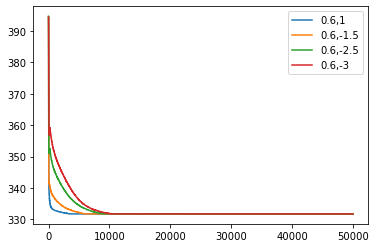

In [32]:
subject="surface_energy"
plt.plot([x*.4 for x in time_data.loc[:,subject]], label='0.6,1')
plt.plot([x*.4 for x in time_data2.loc[:,subject]], label='0.6,-1.5')
plt.plot([x*.4 for x in time_data3.loc[:,subject]], label='0.6,-2.5')
plt.plot([x*.4 for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.legend()

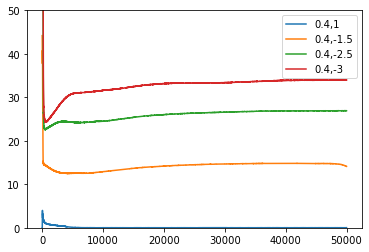

In [33]:
subject="field_energy"
plt.plot([complex(x).real*.4 for x in time_data.loc[:,subject]], label='0.4,1')
plt.plot([complex(x).real*.4 for x in time_data2.loc[:,subject]], label='0.4,-1.5')
plt.plot([complex(x).real*.4 for x in time_data3.loc[:,subject]], label='0.4,-2.5')
plt.plot([complex(x).real*.4 for x in time_data4.loc[:,subject]], label='0.4,-3')
plt.ylim((0,50))
plt.legend()

field energy per area is actuallt better than in .6 case, despite non-rotatoinal state.  But could be even better?  Stil evolving.  Energy of non-rotating states going up for some reason.  -1.5 has probably just introduced a defect.

### try higher temperature 

14.5.21 changed amplitude sampling step so that simulations run correctly at higher temperatures.  Can now equilibrate much faster?  This is still 0th order with no 1st order correction to alpha', bar{E}'

In [34]:
path2 = "/home/jsk/cylinder/chapter3data/2021-05-14_141802" 

In [35]:
infile = os.path.join(path2, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 2000
--field_type lattice
--method  sequential
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10
--temp .01
--temp_final .000001
--intrinsic_curvature  0
--amplitude 0
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



<AxesSubplot:>

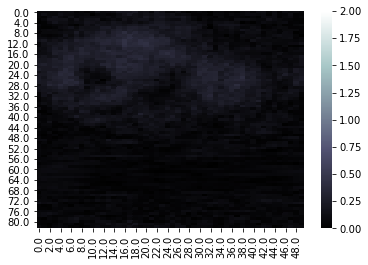

In [36]:
snapshot= sort_csv(path2+"/wavenumber_0.6_alpha_-2.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot, cmap='bone', vmax=2, vmin=0)

Hasn't fully developed order in short simulation time

<AxesSubplot:>

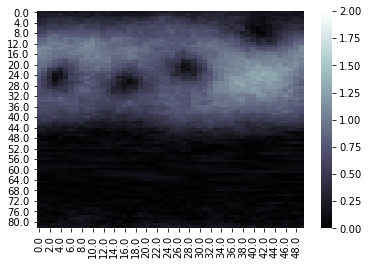

In [37]:
snapshot= sort_csv(path2+"/wavenumber_0.6_alpha_-3.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot, cmap='bone', vmax=2, vmin=0)

Interesting snapshot of developing 4 defects

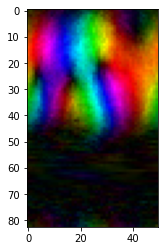

In [38]:
complex_heatmap(path2+"/wavenumber_0.6_alpha_-3.0_snapshot.csv")

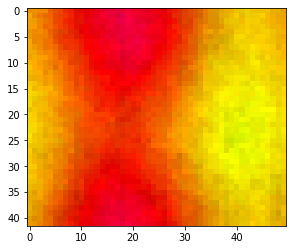

In [39]:
complex_heatmap(path2+"/wavenumber_1.2_alpha_-3.0_snapshot.csv")

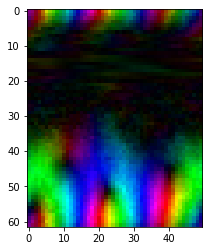

In [40]:
complex_heatmap(path2+"/wavenumber_0.8_alpha_-3.0_snapshot.csv")

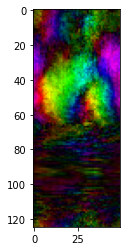

In [41]:
complex_heatmap(path2+"/wavenumber_0.4_alpha_-3.0_snapshot.csv")

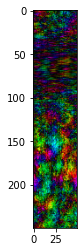

In [42]:
complex_heatmap(path2+"/wavenumber_0.2_alpha_-3.0_snapshot.csv")

In [43]:
time_data= pd.read_csv(path2+"/wavenumber_0.6_alpha_1.0.csv")
time_data1= pd.read_csv(path2+"/wavenumber_0.6_alpha_0.0.csv")
time_data2= pd.read_csv(path2+"/wavenumber_0.6_alpha_-1.0.csv")
time_data3= pd.read_csv(path2+"/wavenumber_0.6_alpha_-2.0.csv")
time_data4= pd.read_csv(path2+"/wavenumber_0.6_alpha_-3.0.csv")

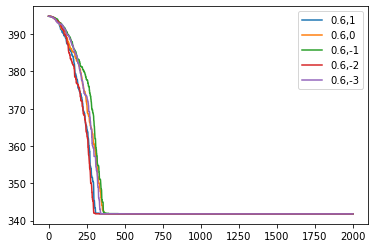

In [44]:
subject="surface_energy"
plt.plot([x*.6 for x in time_data.loc[:,subject]], label='0.6,1')
plt.plot([x*.6 for x in time_data1.loc[:,subject]], label='0.6,0')
plt.plot([x*.6 for x in time_data2.loc[:,subject]], label='0.6,-1')
plt.plot([x*.6 for x in time_data3.loc[:,subject]], label='0.6,-2')
plt.plot([x*.6 for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.legend()

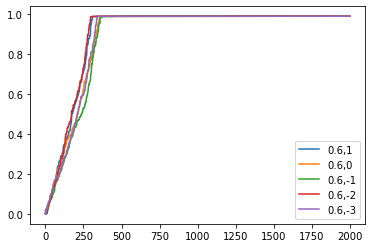

In [45]:
subject="abs_amplitude"
plt.plot([x for x in time_data.loc[:,subject]], label='0.6,1')
plt.plot([x for x in time_data1.loc[:,subject]], label='0.6,0')
plt.plot([x for x in time_data2.loc[:,subject]], label='0.6,-1')
plt.plot([x for x in time_data3.loc[:,subject]], label='0.6,-2')
plt.plot([x for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.legend()

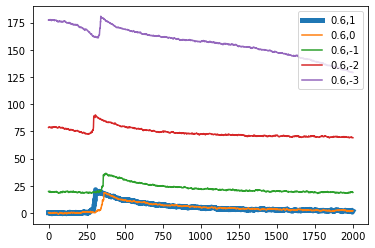

In [46]:
subject="field_energy"
plt.plot([x*.6 for x in time_data.loc[:,subject]], label='0.6,1', linewidth=5)
plt.plot([x*.6 for x in time_data1.loc[:,subject]], label='0.6,0')
plt.plot([x*.6 for x in time_data2.loc[:,subject]], label='0.6,-1')
plt.plot([x*.6 for x in time_data3.loc[:,subject]], label='0.6,-2')
plt.plot([x*.6 for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.legend()

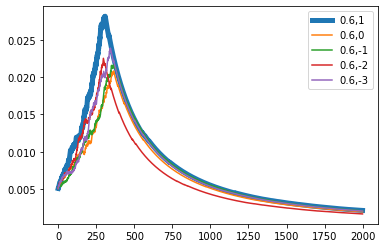

In [47]:
subject="real_group_sampling_width"
plt.plot([x for x in time_data.loc[:,subject]], label='0.6,1', linewidth=5)
plt.plot([x for x in time_data1.loc[:,subject]], label='0.6,0')
plt.plot([x for x in time_data2.loc[:,subject]], label='0.6,-1')
plt.plot([x for x in time_data3.loc[:,subject]], label='0.6,-2')
plt.plot([x for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.legend()

In [48]:
time_data= pd.read_csv(path2+"/wavenumber_1.2_alpha_1.0.csv")
time_data1= pd.read_csv(path2+"/wavenumber_1.2_alpha_0.0.csv")
time_data2= pd.read_csv(path2+"/wavenumber_1.2_alpha_-1.0.csv")
time_data3= pd.read_csv(path2+"/wavenumber_1.2_alpha_-2.0.csv")
time_data4= pd.read_csv(path2+"/wavenumber_1.2_alpha_-3.0.csv")

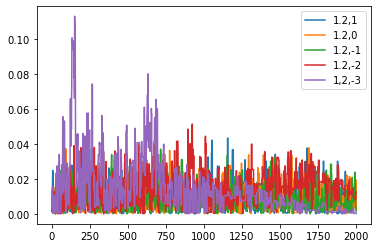

In [49]:
subject="abs_amplitude"
plt.plot([x for x in time_data.loc[:,subject]], label='1.2,1')
plt.plot([x for x in time_data1.loc[:,subject]], label='1.2,0')
plt.plot([x for x in time_data2.loc[:,subject]], label='1.2,-1')
plt.plot([x for x in time_data3.loc[:,subject]], label='1.2,-2')
plt.plot([x for x in time_data4.loc[:,subject]], label='1,2,-3')
plt.legend()

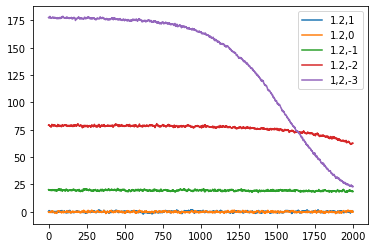

In [50]:
subject="field_energy"
plt.plot([x*1.2 for x in time_data.loc[:,subject]], label='1.2,1')
plt.plot([x*1.2 for x in time_data1.loc[:,subject]], label='1.2,0')
plt.plot([x*1.2 for x in time_data2.loc[:,subject]], label='1.2,-1')
plt.plot([x*1.2 for x in time_data3.loc[:,subject]], label='1.2,-2')
plt.plot([x*1.2 for x in time_data4.loc[:,subject]], label='1,2,-3')
plt.legend()

Will energy of completely ordered fields reach ~0?

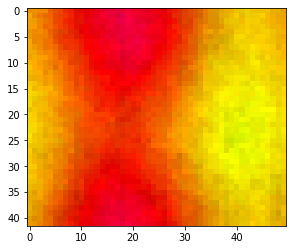

In [51]:
complex_heatmap(path2+"/wavenumber_1.2_alpha_-3.0_snapshot.csv")

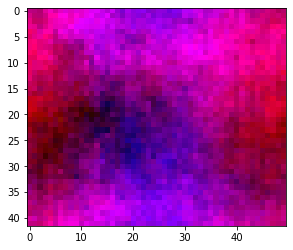

In [52]:
complex_heatmap(path2+"/wavenumber_1.2_alpha_-2.0_snapshot.csv")

almost all ordered


<AxesSubplot:>

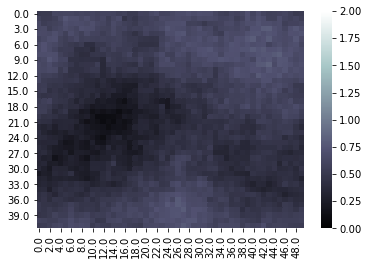

In [53]:
snapshot= sort_csv(path2+"/wavenumber_1.2_alpha_-2.0_snapshot.csv", dtype=complex)
sb.heatmap(snapshot, cmap='bone', vmax=2, vmin=0)

In [58]:
path3 = "/home/jsk/cylinder/chapter3data/2021-05-14_174036" 

In [59]:
infile = os.path.join(path2, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 20000
--field_type lattice
--method  sequential
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10
--temp .01
--temp_final .000001
--intrinsic_curvature  0
--amplitude 0
--radius 1
--wavenumber  1
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100  
--dims 50 50



<AxesSubplot:>

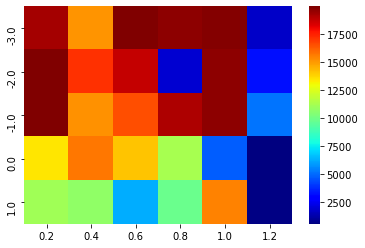

In [60]:
global_cutoff= sort_csv(path3+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

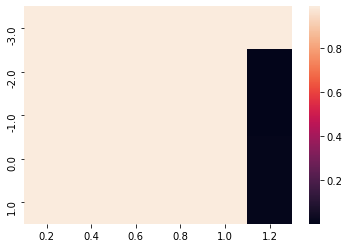

In [61]:
global_cutoff= sort_csv(path3+"/abs_amplitude.csv")
sb.heatmap(global_cutoff)

<AxesSubplot:>

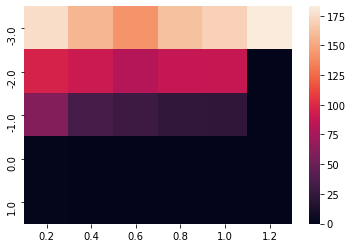

In [62]:
global_cutoff= sort_csv(path3+"/field_energy.csv")
sb.heatmap(global_cutoff)

<AxesSubplot:>

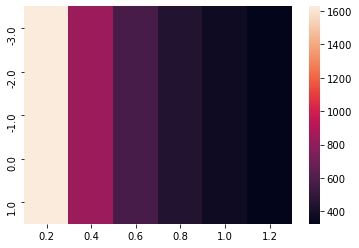

In [63]:
global_cutoff= sort_csv(path3+"/surface_energy.csv")
sb.heatmap(global_cutoff)

In [86]:
time_data= pd.read_csv(path3+"/wavenumber_0.6_alpha_1.0.csv")
time_data1= pd.read_csv(path3+"/wavenumber_0.6_alpha_0.0.csv")
time_data2= pd.read_csv(path3+"/wavenumber_0.6_alpha_-1.0.csv")
time_data3= pd.read_csv(path3+"/wavenumber_0.6_alpha_-2.0.csv")
time_data4= pd.read_csv(path3+"/wavenumber_0.6_alpha_-3.0.csv")

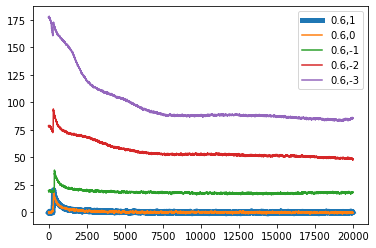

In [87]:
subject="field_energy"
plt.plot([x*.6 for x in time_data.loc[:,subject]], label='0.6,1', linewidth=5)
plt.plot([x*.6 for x in time_data1.loc[:,subject]], label='0.6,0')
plt.plot([x*.6 for x in time_data2.loc[:,subject]], label='0.6,-1')
plt.plot([x*.6 for x in time_data3.loc[:,subject]], label='0.6,-2')
plt.plot([x*.6 for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.legend()

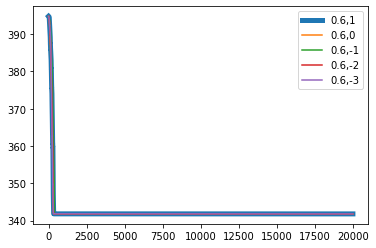

In [89]:
subject="surface_energy"
plt.plot([x*.6 for x in time_data.loc[:,subject]], label='0.6,1', linewidth=5)
plt.plot([x*.6 for x in time_data1.loc[:,subject]], label='0.6,0')
plt.plot([x*.6 for x in time_data2.loc[:,subject]], label='0.6,-1')
plt.plot([x*.6 for x in time_data3.loc[:,subject]], label='0.6,-2')
plt.plot([x*.6 for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.legend()

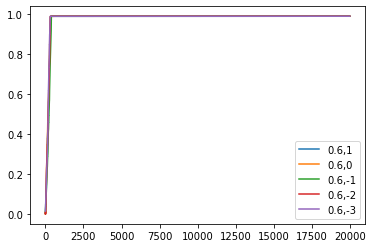

In [67]:
subject="abs_amplitude"
plt.plot([x for x in time_data.loc[:,subject]], label='0.6,1')
plt.plot([x for x in time_data1.loc[:,subject]], label='0.6,0')
plt.plot([x for x in time_data2.loc[:,subject]], label='0.6,-1')
plt.plot([x for x in time_data3.loc[:,subject]], label='0.6,-2')
plt.plot([x for x in time_data4.loc[:,subject]], label='0.6,-3')
plt.legend()

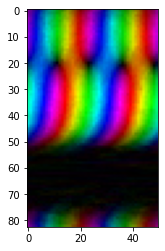

In [92]:
complex_heatmap(path3+"/wavenumber_0.6_alpha_-3.0_snapshot.csv")

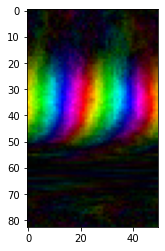

In [91]:
complex_heatmap(path3+"/wavenumber_0.6_alpha_-1.0_snapshot.csv")

Some of these half-developed ones

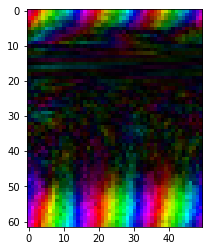

In [82]:
complex_heatmap(path3+"/wavenumber_0.8_alpha_-1.0_snapshot.csv")

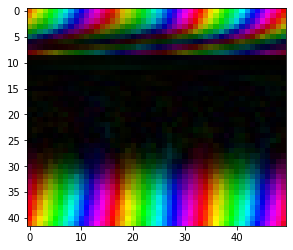

In [102]:
complex_heatmap(path3+"/wavenumber_1.2_alpha_-3.0_snapshot.csv") #this one destabilized for unknown reason

In [96]:
time_data= pd.read_csv(path3+"/wavenumber_1.2_alpha_1.0.csv")
time_data1= pd.read_csv(path3+"/wavenumber_1.2_alpha_0.0.csv")
time_data2= pd.read_csv(path3+"/wavenumber_1.2_alpha_-1.0.csv")
time_data3= pd.read_csv(path3+"/wavenumber_1.2_alpha_-2.0.csv")
time_data4= pd.read_csv(path3+"/wavenumber_1.2_alpha_-3.0.csv")

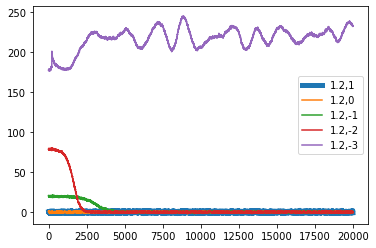

In [107]:
subject="field_energy"
plt.plot([x*1.2 for x in time_data.loc[:,subject]], label='1.2,1', linewidth=5)
plt.plot([x*1.2 for x in time_data1.loc[:,subject]], label='1.2,0')
plt.plot([x*1.2 for x in time_data2.loc[:,subject]], label='1.2,-1')
plt.plot([x*1.2 for x in time_data3.loc[:,subject]], label='1.2,-2')
plt.plot([x*1.2 for x in time_data4.loc[:,subject]], label='1.2,-3')
plt.legend()
#total energy would be less with straight field on flat surface

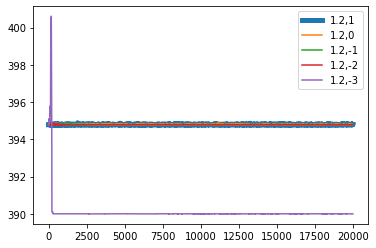

In [104]:
subject="surface_energy"
plt.plot([x*1.2 for x in time_data.loc[:,subject]], label='1.2,1', linewidth=5)
plt.plot([x*1.2 for x in time_data1.loc[:,subject]], label='1.2,0')
plt.plot([x*1.2 for x in time_data2.loc[:,subject]], label='1.2,-1')
plt.plot([x*1.2 for x in time_data3.loc[:,subject]], label='1.2,-2')
plt.plot([x*1.2 for x in time_data4.loc[:,subject]], label='1.2,-3')
plt.legend()
#even at k=1.2, surface energy is less in curved state? but energy barier between a=0, a=.99

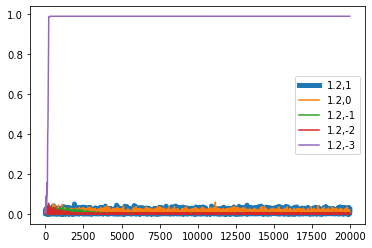

In [103]:
subject="abs_amplitude"
plt.plot([x for x in time_data.loc[:,subject]], label='1.2,1', linewidth=5)
plt.plot([x for x in time_data1.loc[:,subject]], label='1.2,0')
plt.plot([x for x in time_data2.loc[:,subject]], label='1.2,-1')
plt.plot([x for x in time_data3.loc[:,subject]], label='1.2,-2')
plt.plot([x for x in time_data4.loc[:,subject]], label='1.2,-3')
plt.legend()

#need to change to more fieldsteps_per_ampstep or reboot field step size occasionally

rehabilitate the row(s) twist step

In [108]:
path_twist1 = "/home/jsk/cylinder/chapter3data/2021-05-14_220514"  #these short simulations
#had a few twists of big
#groups of rows applied, check array.o* files
#this one works, is accepted sometimes at higher temperatures
#(because only does discrete changes whose stepsize cant be adjusted)

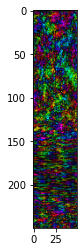

In [114]:
complex_heatmap(path_twist1+"/wavenumber_0.2_alpha_-1.0_snapshot.csv")

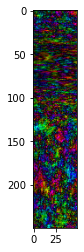

In [115]:
complex_heatmap(path_twist1+"/wavenumber_0.2_alpha_-2.0_snapshot.csv")

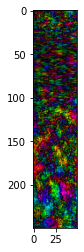

In [116]:
complex_heatmap(path_twist1+"/wavenumber_0.2_alpha_-3.0_snapshot.csv")

In [119]:
time_data= pd.read_csv(path_twist1+"/wavenumber_0.2_alpha_1.0.csv")
time_data1= pd.read_csv(path_twist1+"/wavenumber_0.2_alpha_0.0.csv")
time_data2= pd.read_csv(path_twist1+"/wavenumber_0.2_alpha_-1.0.csv")
time_data3= pd.read_csv(path_twist1+"/wavenumber_0.2_alpha_-2.0.csv")
time_data4= pd.read_csv(path_twist1+"/wavenumber_0.2_alpha_-3.0.csv")

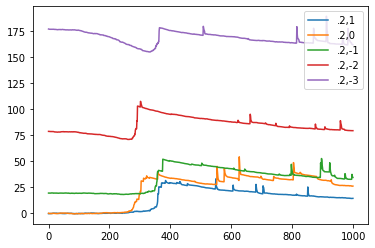

In [121]:
subject="field_energy"
plt.plot([x*.2 for x in time_data.loc[:,subject]], label='.2,1')
plt.plot([x*.2 for x in time_data1.loc[:,subject]], label='.2,0')
plt.plot([x*.2 for x in time_data2.loc[:,subject]], label='.2,-1')
plt.plot([x*.2 for x in time_data3.loc[:,subject]], label='.2,-2')
plt.plot([x*.2 for x in time_data4.loc[:,subject]], label='.2,-3')
plt.legend()

See the twist of a few rows happening occasionally - only ever up so far?

In [122]:
time_data= pd.read_csv(path_twist1+"/wavenumber_0.4_alpha_1.0.csv")
time_data1= pd.read_csv(path_twist1+"/wavenumber_0.4_alpha_0.0.csv")
time_data2= pd.read_csv(path_twist1+"/wavenumber_0.4_alpha_-1.0.csv")
time_data3= pd.read_csv(path_twist1+"/wavenumber_0.4_alpha_-2.0.csv")
time_data4= pd.read_csv(path_twist1+"/wavenumber_0.4_alpha_-3.0.csv")

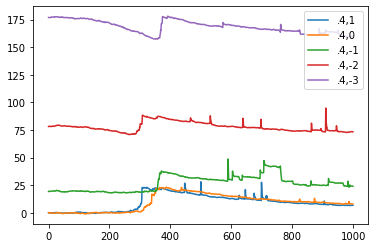

In [124]:
subject="field_energy"
plt.plot([x*.4 for x in time_data.loc[:,subject]], label='.4,1')
plt.plot([x*.4 for x in time_data1.loc[:,subject]], label='.4,0')
plt.plot([x*.4 for x in time_data2.loc[:,subject]], label='.4,-1')
plt.plot([x*.4 for x in time_data3.loc[:,subject]], label='.4,-2')
plt.plot([x*.4 for x in time_data4.loc[:,subject]], label='.4,-3')
plt.legend()

Some twist steps appear to decrease energy here

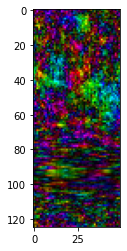

In [129]:
complex_heatmap(path_twist1+"/wavenumber_0.4_alpha_-1.0_snapshot.csv")